# Demo: Stacking

In this demo of code for stacking in ensemble model, we will make some base learners as following: KNN, SVM.SVC, Logistic Regression, Naive Bayes, Decision_Tree. Then construct an ensemble model by stacking those base learners

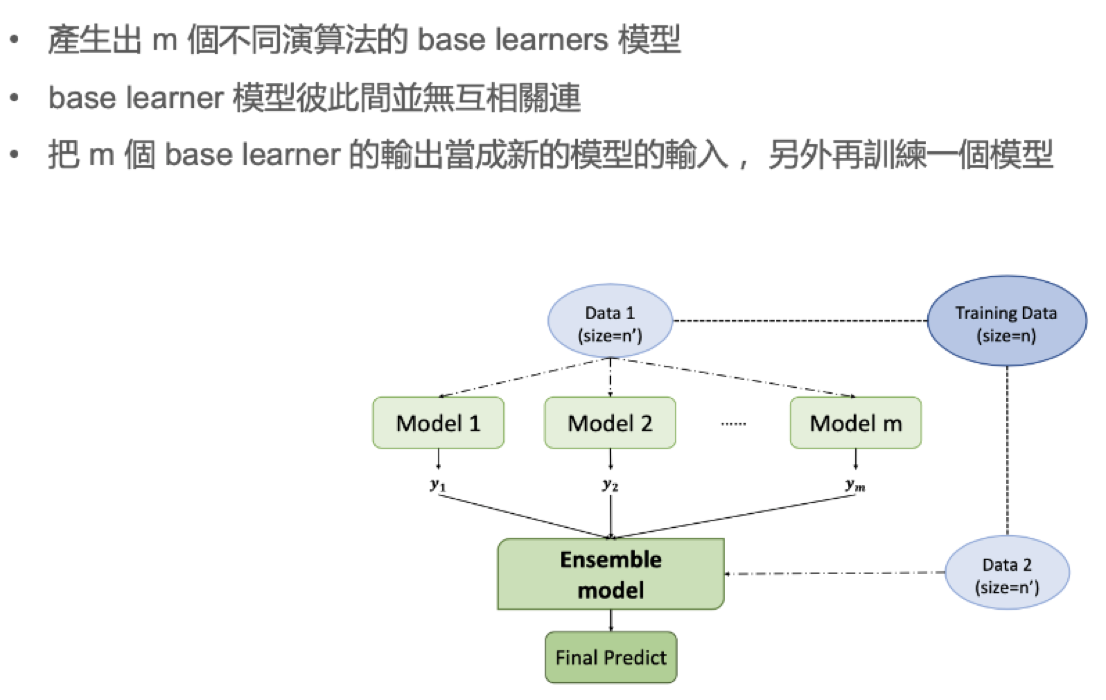

Problem: Image digit recognition, classifying digit image into 10 predefined classed (0-9)

## Task 1: Preparing data

In [34]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [35]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
# data = digits.data
print(data.shape)

(1797, 64)


In [36]:
X = data/16
y = digits.target

## Task 2: Make a Cross validation score to compare preformance of each models

In [37]:
# import packages to use
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt

In [38]:
# Define a function to get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(solver='lbfgs',max_iter=1000)
    models['knn'] = KNeighborsClassifier(n_neighbors=3)
    models['dtree'] = DecisionTreeClassifier(criterion='gini')
    models['svm'] = SVC(C=10,kernel='rbf')
    models['bayes'] = MultinomialNB()
    return models

In [39]:
# Define a function with input is model data input (X), label (y), 
# then compute the cross validation score for model with kfold = 10
# Repeat this 3 times, n_repeats = 3
def evaluate_model(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    scores = cross_val_score(model,X,y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=1,
                             error_score='raise')
    return scores

Model name lr, mean of cv score: 0.9684543761638733, std of cv score: 0.01258727641896303
Model name knn, mean of cv score: 0.9883157459135112, std of cv score: 0.007519650247549528
Model name dtree, mean of cv score: 0.8540202772605007, std of cv score: 0.02552737100914962
Model name svm, mean of cv score: 0.9910955927995033, std of cv score: 0.005672740547089884
Model name bayes, mean of cv score: 0.900022760190358, std of cv score: 0.026886537752854243


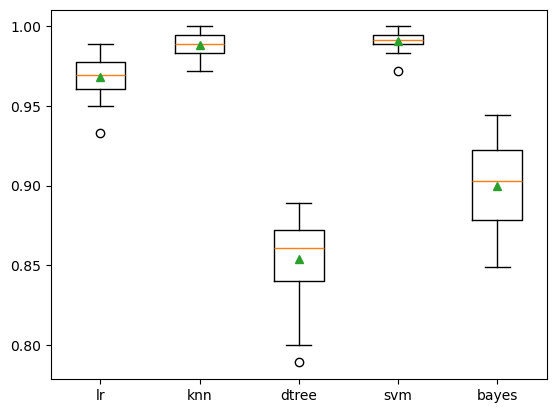

In [40]:
# get the models to evaluate
models = get_models()
# Evaluate the models and store results
results, names = list(),list()
for name, model in models.items():
    scores = evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print(f"Model name {name}, mean of cv score: {np.mean(scores)}, std of cv score: {np.std(scores)}")
plt.boxplot(results,labels=names,showmeans=True)
plt.show()

## Task 3: Stacking model
In this task we combine these five models into a single model using stacking.

We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.

We will use the StackingClassifier model in sklearn.ensemble package

In [44]:
from sklearn.ensemble import StackingClassifier

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(("lr",LogisticRegression(solver='lbfgs',max_iter=1000)))
    level0.append(("knn",KNeighborsClassifier(n_neighbors=3)))
    level0.append(("dtree",DecisionTreeClassifier(criterion='gini')))
    level0.append(('svm',SVC(C = 10,kernel='rbf')))
    level0.append(('bayes',MultinomialNB()))
    # define meta learner model
    level1 = LogisticRegression(solver='lbfgs',max_iter=1000)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0,final_estimator=level1,cv = 5)
    return model
# get a list of 5 model and append stacking model to evaluate
six_models = get_models()
six_models['stacking'] = get_stacking()

# Evaluate the models and store results
results, names = list(),list()
for name,model in six_models.items():
    scores = evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)

Model name lr, mean of cv score: 0.9684543761638733, std of cv score: 0.01258727641896303
Model name knn, mean of cv score: 0.9883157459135112, std of cv score: 0.007519650247549528
Model name dtree, mean of cv score: 0.852727084626526, std of cv score: 0.024334340561572524
Model name svm, mean of cv score: 0.9910955927995033, std of cv score: 0.005672740547089884
Model name bayes, mean of cv score: 0.900022760190358, std of cv score: 0.026886537752854243
Model name stacking, mean of cv score: 0.9881284916201117, std of cv score: 0.007143966172706336


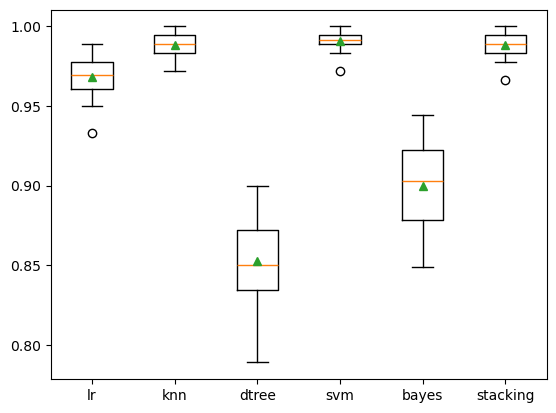

In [46]:
for name, scores in zip(names,results):
    print(f"Model name {name}, mean of cv score: {np.mean(scores)}, std of cv score: {np.std(scores)}")
plt.boxplot(results,labels=names,showmeans=True)
plt.show()